The following cells will load the Vegas dataset.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
Vegas = pd.read_csv('vegas.csv')
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()

Before we get started, we're going to want to sort the month variable in order.  The easiest way to do this is to convert this to a `datetime` object.  The following command does this.

In [21]:
Vegas.review_month = pd.to_datetime( Vegas.review_month, format = '%B' )

In [22]:
by_month_pool = Vegas.groupby(['review_month','pool'])

In [23]:
by_month_pool.mean()

nr_reviews  nr_hotel_reviews  helpful_votes  score  \
review_month pool                                                       
1900-01-01   NO         65.00             12.50          44.00   4.00   
             YES        69.83             18.23          40.45   4.15   
1900-02-01   NO         25.00              8.00          19.50   4.50   
             YES        67.17             16.57          40.77   4.20   
1900-03-01   NO         18.00              6.50          14.50   3.50   
             YES        54.15             16.30          33.27   4.33   
1900-04-01   NO         23.50              6.50          25.00   4.00   
             YES        44.08             14.68          33.08   4.08   
1900-05-01   NO         18.00              5.00           9.50   3.50   
             YES        49.15             15.90          35.25   3.80   
1900-06-01   NO         61.00             16.50          41.00   2.50   
             YES        36.45             14.60          33.02   4.22   
1900-07-01   NO         14.50              5.50          11.00   2.50   
             YES        33.92             13.68          23.25   4.20   
1900-08-01   NO         74.50             10.00          16.50   3.50   
             YES        60.62             23.65          39.77   4.30   
1900-09-01   NO          8.50              5.50           5.00   2.50   
             YES        55.40             25.02          37.83   4.25   
1900-10-01   NO         24.50              8.00          22.50   2.50   
             YES        34.38             11.03          21.20   4.12   
1900-11-01   NO          7.00              4.00           2.50   2.50   
             YES        38.45             13.35          22.12   4.12   
1900-12-01   NO         11.00              5.50          11.00   3.00   
             YES        45.33             14.22          28.95   4.25   

                   nr_rooms  member_years  
review_month pool                          
1900-01-01   NO    3,773.00          6.00  
             YES   2,117.55          4.78  
1900-02-01   NO    3,773.00          4.00  
             YES   2,117.55        -41.08  
1900-03-01   NO    3,773.00          4.50  
             YES   2,117.55          4.80  
1900-04-01   NO    3,773.00          2.00  
             YES   2,117.55          4.92  
1900-05-01   NO    3,773.00          4.00  
             YES   2,117.55          3.62  
1900-06-01   NO    3,773.00          6.50  
             YES   2,117.55          4.53  
1900-07-01   NO    3,773.00          1.00  
             YES   2,117.55          4.35  
1900-08-01   NO    3,773.00          1.50  
             YES   2,117.55          4.22  
1900-09-01   NO    3,773.00          3.00  
             YES   2,117.55          4.08  
1900-10-01   NO    3,773.00          6.00  
             YES   2,117.55          4.00  
1900-11-01   NO    3,773.00          5.00  
             YES   2,117.55          3.75  
1900-12-01   NO    3,773.00          2.50  
             YES   2,117.55          5.40

Compute the mean again, but select only the score variable.  Unstack the output so you have a column for hotels with a pool and a column for no pool.

In [24]:
by_month_pool.score.mean().unstack()

pool,NO,YES
review_month,,
1900-01-01,4.00,4.15
1900-02-01,4.50,4.20
1900-03-01,3.50,4.33
1900-04-01,4.00,4.08
1900-05-01,3.50,3.80
1900-06-01,2.50,4.22
1900-07-01,2.50,4.20
1900-08-01,3.50,4.30
1900-09-01,2.50,4.25


Now create a bar plot.  You should have one color for pool, one color for no pool.  Along the x-axis, you should have a pair of bars for January, a pair for February, and so forth. 

Examine the plot and see if the score increase associated with a pool varies by the time of year.

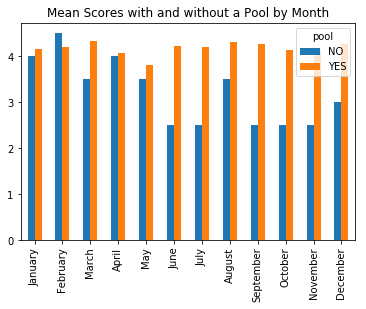

In [65]:
import matplotlib.dates as mdates

df = by_month_pool.score.mean().unstack()
df.index = pd.Series(df.index).dt.strftime('%B')
df.plot.bar()
plt.title("Mean Scores with and without a Pool by Month")
plt.xlabel("")